In [1]:
# 1. 선형회귀

# 파라미터 설정 방법
# 1. 가장 잘맞는 파라미터 구하기
# 2. 경사하강법(천천히 구하는 방법)을 통해 구하기

In [15]:
# 결과 = a*특성1 + an*특성n + 상수값


# 데이터 생성
import numpy as np

X = 2*np.random.rand(100, 1) 
# 0부터 1까지의 난수를 100*1크기의 행렬로 생성
# 2를 곱했으므로 0부터 2까지의 난수를 100*1크기의 행렬로 생성
# 샘플은 100개 특성은 1개

y = 4 + 3*X + np.random.randn(100, 1)
# randn은 표준분포에 대한 난수를 발생 즉, 1부터 -1인 난수를 100*1크기만큼 생성
# 그냥 함수의 다양성을 위해 서용했음

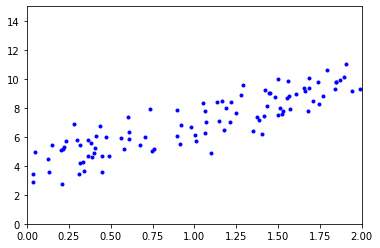

In [3]:
# 데이터 표현
import matplotlib.pyplot as plt

plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15]) # x의 범위는 0부터 2, y의 범위는 0부터 15
plt.show()

In [16]:
# 정규방정식을 통해 파라미터 찾기

X_b = np.c_[np.ones((100, 1)), X] 
# 모든 샘플에 x0 = 1을 추가
# (1, X0)
# (1, X1)
# ... 형태
# np.c_ 는 기존 데이터에 일정 데이터를 추가해주는 함수
# ones -> 1을 100*1만큼 추가
# X_b는 100*2행렬이 됨


theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
# 정규방정식 계산식
# 이를 통해 mse가 최소가 되는 즉 0이되는 최적의 파라미터 구하기
# np.linalg -> 선형대수 모듈
# inv -> 역행렬 계산
# dot -> 행렬 곱셈

# 계산 과정(단위 : 행렬)
# X_b.T --> (2, 100) --> T는 자리 바꿈
# X_b.T.dot(X_b) --> (2, 100)(100, 2) --> (2, 2)
# np.linalg.inv --> (2, 2)
# np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T) --> (2, 2)(2, 100) --> (2, 100)
# np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y) --> (2, 100)(100, 1) --> (2, 1)
# result : (2, 1)


theta_best
# 4와 3을 기대하지만 잡음때문에 정확하진 않음

array([[4.24374144],
       [2.84334541]])

In [18]:
# 예측

# 예측 그래프를 그리기 위한 데이터 생성
X_new = np.array([[0], [2]]) # X_new => 0, 2
X_new_b = np.c_[np.ones((2, 1)), X_new] # 모든 샘플에 x0 = 1을 추가
y_predict = X_new_b.dot(theta_best) # 위에서 구한 파라미터 대입하여 함수 그래프 구하기
y_predict

array([[4.24374144],
       [9.93043226]])

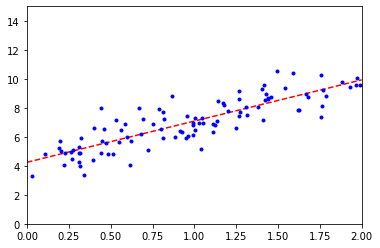

In [19]:
plt.plot(X_new, y_predict, "r--")
plt.plot(X, y, "b.")
plt.axis([0,2,0,15])
plt.show()

In [7]:
# 위의 선형회귀를 사이킷런을 통한 선형회귀로 구하기

from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X,y)
lin_reg.intercept_, lin_reg.coef_

(array([3.91645311]), array([[3.02386481]]))

In [8]:
lin_reg.predict(X_new) # X_new = [0, 2] 

array([[3.91645311],
       [9.96418274]])

In [9]:
# 최소제곱으로 파라미터 구하기(선형회귀의 재현)

theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)
theta_best_svd

array([[3.91645311],
       [3.02386481]])

In [10]:
# 최소제곱은 파라미터 = X의 유사역행렬 * y로 계산

np.linalg.pinv(X_b).dot(y)

array([[3.91645311],
       [3.02386481]])

In [20]:
# 경사하강법 구현
# 1. 배치 경사 하강법

eta = 0.1 # 학습률
n_iterations = 1000
m = 100

theta = np.random.randn(2,1) # 무작위 초기화

for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients

theta

array([[4.24374144],
       [2.84334541]])

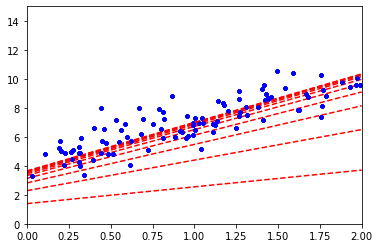

In [21]:
# 학습률에 따른 그래프 표현

def plot_gredient_descent(eta, theta_path=None):
    m = len(X_b)
    theta = np.random.randn(2,1)
    n_iterations = 1000
    
    for iteration in range(n_iterations):
        gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
        theta = theta - eta * gradients
        if iteration < 10:
            X_new = np.array([[0], [2]]) # x의범위는 0부터 2 
            X_new_b = np.c_[np.ones((2, 1)), X_new] # 모든 샘플에 x0 = 1을 추가
            y_predict = X_new_b.dot(theta) # 위에서 구한 파라미터 대입하여 함수 그래프 구하기
            y_predict
            plt.plot(X_new, y_predict, "r--")
            plt.plot(X, y, "b.")
            plt.axis([0,2,0,15])
        if iteration == 10:
            plt.show()
            
plot_gredient_descent(0.1)

In [13]:
# 2. 확률적 경사하강법
# 훈련데이터에서 무작위로 샘플을 선정해서 그레디언트(경사율)을 구하면서 최적의 파라미터를 찾음(계속되는 갱신을 통해)
# 시간이 단축되지만 정확도가 떨어질 가능성이 있음

# 학습스케쥴
# 학습스케쥴을 조정해 확률적 경사하강법을 강화
# 학습률을 점점 작게하는 방법

theta_path_sgd = []
n_epochs = 50
t0, t1 = 5, 50 # 학습 스케쥴 하이퍼파라미터


# 0.1의 학습률에서 점점 줄어듦.
def learning_schedule(t):
    return t0 / (t + t1)

theta = np.random.randn(2,1) # 무작위 초기화
m = len(X_b) # m = 100


for epoch in range(n_epochs):
    for i in range(m): # 한 에포크안에 전체 무작위 샘플에 대한 실행
        random_index = np.random.randint(m) # 0-99중 하나의 인덱스 설정
        xi = X_b[random_index:random_index+1] # ex) random_index = 10, xi = X_b[10:11]
        yi = y[random_index:random_index+1] # yi = y[10:11]
        gradients = 2*xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients
        theta_path_sgd.append(theta) # theta_path_sgd 배열에 theta 값 추가를 반복
        
theta

array([[3.80879686],
       [3.05299745]])

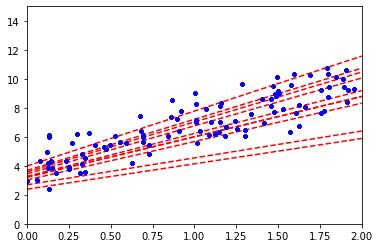

In [14]:
# 위에서 추가한 theta값들을 통해 10개까지 그래프 그려보기

i = 0

for theta_path in theta_path_sgd:
    X_new = np.array([[0], [2]]) # x의범위는 0부터 2 
    X_new_b = np.c_[np.ones((2, 1)), X_new] # 모든 샘플에 x0 = 1을 추가
    y_predict = X_new_b.dot(theta_path) # 위에서 구한 파라미터 대입하여 함수 그래프 구하기
    y_predict
    plt.plot(X_new, y_predict, "r--")
    plt.plot(X, y, "b.")
    plt.axis([0,2,0,15])
    i = i + 1
    if i == 10:
        plt.show()
        break
    

In [15]:
len(theta_path_sgd) # 5000번의 실행 --> 50번의 에포크당 100번의 전체샘플 내의 무작위 샘플을 가지고 실행

5000

In [16]:
# 사이킷런에서 제공하는 확률적경사하강법

from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(max_iter = 1000, tol = 1e-3, penalty = None, eta0 = 0.1)
# max_iter -> 에포크 수, tol -> 해당하는 숫자보다 적께 손실이 줄어들때까지 실행, eta0 -> 학습률, penalty -> 규제
sgd_reg.fit(X, y.ravel())

SGDRegressor(eta0=0.1, penalty=None)

In [17]:
sgd_reg.intercept_, sgd_reg.coef_

(array([3.7906772]), array([3.0371249]))

In [18]:
# 선형회귀 정리

# 종류
# 1. 정규 방정식
# 2. SVD
# 3. 배치 경사 하강법
# 4. 확률정 경사 하강법
# 5. 미니배치 경사 하강법

# 고찰
# 1,2는 한번에, 3,4,5는 조금씩 분석 즉, 3,4,5는 많은 데이터를 조금씩 학습하는데 용이
# 3은 4,5보다 시간이 오래걸림
# 5가지의 선형회귀에 장단점을 따져 적절한 환경에서 필요한 적절한 모델 선택
# 176p 표에 장단점 정리되어 있음. 

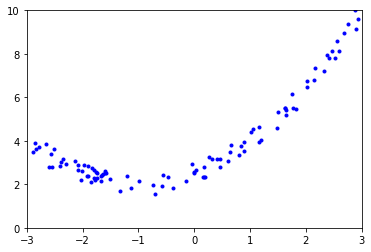

In [19]:
# 2. 다항 회귀
# 방법 -> 선형회귀를 사용하되, 각 특성의 거듭제곱으로 새로운 특성을 추가

# 데이터 생성
import numpy as np
m = 100
X = 6*np.random.rand(m, 1) -3
y = 0.5*X**2 + X + 2 + np.random.rand(m, 1)

# 그래프 그려보기
import matplotlib.pyplot as plt
plt.plot(X, y, "b.")
plt.axis([-3, 3, 0, 10])
plt.show()

In [20]:
# 위에서 생성한 훈련세트의 특성을 제곱하여 새로운 특성을 추가

from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree = 2, include_bias = False)
X_poly = poly_features.fit_transform(X)
X[0]

array([0.59899706])

In [21]:
X_poly[0]

array([0.59899706, 0.35879748])

In [22]:
# 선형회귀에 데이터세트 훈련

from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_
# 상수, X의계수, X제곱의 계수

(array([2.52253024]), array([[0.97675891, 0.50531246]]))

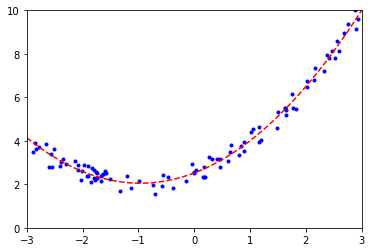

In [23]:
# 그래프 그려보기
X_new = np.linspace(-3, 3, 100) # -3부터 3까지 100개의 데이터


plt.plot(X, y, "b.")
y_new = lin_reg.coef_[0][1]*X_new**2 + lin_reg.coef_[0][0]*X_new + lin_reg.intercept_
plt.plot(X_new, y_new, "r--")
plt.axis([-3, 3, 0, 10])
plt.show()

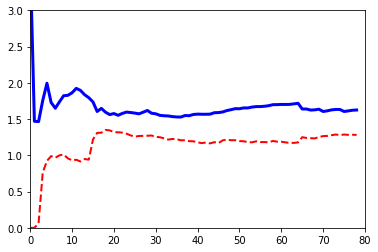

In [24]:
# 학습 곡선
# 1차 방정식에 대한 학습곡선

from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y): # 모델과 데이터 x, y를 입력받음
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2) # 훈련세트와 검증세트로 나눔
    train_errors, val_errors = [], [] # 훈련세트와 검증세트 에러를 담을 변수
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m]) # 훈련시킴
        y_train_predict = model.predict(X_train[:m]) # 훈련세트에 대한 예측
        y_val_predict = model.predict(X_val) # 검증세트에 대한 예측
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict)) # 훈련세트에에 대한 rmse점수 추가
        val_errors.append(mean_squared_error(y_val, y_val_predict)) # 교차 검증에 대한 rmse점수 추가
    plt.plot(np.sqrt(train_errors), "r--", linewidth = 2, label ="Train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth = 3, label ="Val")
    plt.axis([0, 80, 0, 3])
    
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)

# 그래프 분석
# 1. 훈련세트가 많아질수록 과소적합
# 2. 훈련데이터의 성능에서 훈련세트가 많아질수록 잡음이 많아지고 비선형이기에 모델이 훈련데이터를 완벽하게 학습하는것이 불가능
# 3. 검증데이터의 성능에서 샘플이 증가함에 따라 오차가 감소함을 확인 가능
# 정리 -> 과소적합시에는 훈련샘플을 더 추가해도 효과가 없기에 더 복잡한 모델을 사용하거나 더 나은 특성을 선택해야 한다.

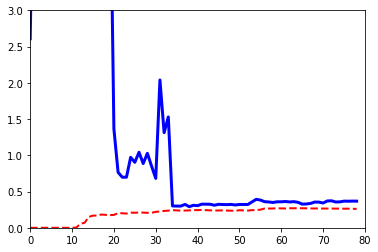

In [25]:
# 10차 방정식에 대한 학습곡선

from sklearn.pipeline import Pipeline
polynomial_regression = Pipeline([
    ("poly_features", PolynomialFeatures(degree = 10, include_bias = False)),
    ("lin_reg", LinearRegression()),
])
plot_learning_curves(polynomial_regression, X, y)

# 그래프 분석
# 1. 처음에 두 곡선 사이에 공간이 크지만 샘플이 추가됨에 따라 공간이 줄어듦.
# 즉, 공간이 크다는 것은 과대적합을 의미하는데 훈련량이 많아짐에 따라 과대적합 해소
# 과대적합을 해소하기 위해서는 더 많은 훈련데이터가 훈련에 사용되어야 함.

In [26]:
# 오차의 원인 분석

# 1. 편향 -> 잘못된 가정이 원인, ex) 2차 곡선을 직선으로 판단, 과소적합의 원인
# 2. 분산 -> 모델이 훈련데이터에 작은 변동에 너무 민감히 반응, 과대적합의 원인
# 3. 줄일 수 없는 오차 -> 훈련데이터의 잡음 때문에 발생, 잡음을 제가해야 함
# 통상적으로 분산과 편향을 트레이드오프 관계이다.

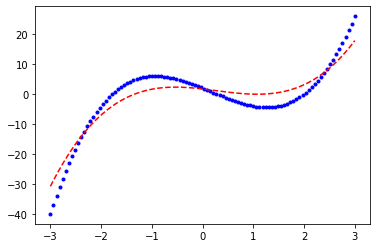

In [27]:
# 규제
# 과대 적합과 과소적합을 조절하기 위해 규제를 사용한다.
# 특정 알파 값을 조정함으로써 그 크기를 조절

# 규제 1. 릿지 회귀
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
reidge_reg = Ridge(alpha=1, solver="cholesky")

X_new = np.linspace(-3, 3, 100).reshape(100, 1)
y_new = 2*X_new**3 - X_new**2 - 7*X_new + 2

make_pipeline = Pipeline([
    ("poly_features", PolynomialFeatures(degree=3, include_bias = False)), # 3차함수
    ("std_scaler", StandardScaler()), # 정규화
    ("ridge_reg", Ridge(alpha = 10, solver="cholesky")), # 알파값을 조정함으로써 규제, 값이 클수록 규제가 강해짐
])

make_pipeline.fit(X_new, y_new)
y_pip_predictions = make_pipeline.predict(X_new)

plt.plot(X_new, y_new, "b.")
plt.plot(X_new, y_pip_predictions, "r--")
plt.show()

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


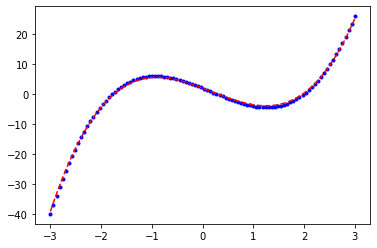

In [28]:
# 확률적 경사하강법을 사용하여 릿지회귀 구현

from sklearn.linear_model import SGDRegressor

make_pipeline = Pipeline([
    ("poly_features", PolynomialFeatures(degree=3, include_bias = False)), # 3차함수
    ("std_scaler", StandardScaler()), # 정규화
    ("sgd_reg", SGDRegressor(penalty="l2")), # 알파값을 조정함으로써 규제, 값이 클수록 규제가 강해짐
])

make_pipeline.fit(X_new, y_new)
y_pip_predictions = make_pipeline.predict(X_new)

plt.plot(X_new, y_new, "b.")
plt.plot(X_new, y_pip_predictions, "r--")
plt.show()

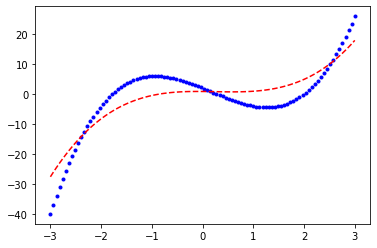

In [29]:
# 규제 2. 라쏘회귀
# 특징
# 릿지회귀보다 규제값 알파가 작음.
# 덜 중요한 특성의 가중치를 자동으로 제거한다.

from sklearn.linear_model import Lasso
make_pipeline = Pipeline([
    ("poly_features", PolynomialFeatures(degree=3, include_bias = False)), # 3차함수
    ("std_scaler", StandardScaler()), # 정규화
    ("lasso_reg", Lasso(alpha = 1)), # 알파값을 조정함으로써 규제, 값이 클수록 규제가 강해짐
])

make_pipeline.fit(X_new, y_new)
y_pip_predictions = make_pipeline.predict(X_new)

plt.plot(X_new, y_new, "b.")
plt.plot(X_new, y_pip_predictions, "r--")
plt.show()

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


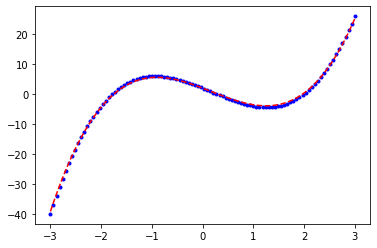

In [30]:
# 확률적 경사하강법을 사용한 라쏘회귀

make_pipeline = Pipeline([
    ("poly_features", PolynomialFeatures(degree=3, include_bias = False)), # 3차함수
    ("std_scaler", StandardScaler()), # 정규화
    ("sgd_reg", SGDRegressor(penalty="l1")), # 알파값을 조정함으로써 규제, 값이 클수록 규제가 강해짐
])

make_pipeline.fit(X_new, y_new)
y_pip_predictions = make_pipeline.predict(X_new)

plt.plot(X_new, y_new, "b.")
plt.plot(X_new, y_pip_predictions, "r--")
plt.show()

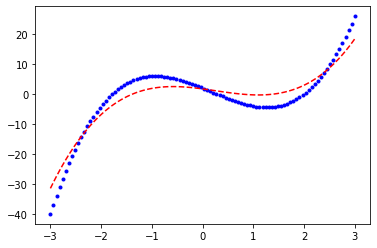

In [31]:
# 규제 3. 엘라스틱넷
# 특징
# 1. 규제항은 릿지와 회귀의 규제항을 단순히 더해서 사용
# 2. 혼합정도는 r을 통해 조절 -> 0이면 릿지회귀와 동일, 1이면 라쏘회귀와 동일

from sklearn.linear_model import ElasticNet

make_pipeline = Pipeline([
    ("poly_features", PolynomialFeatures(degree=3, include_bias = False)), # 3차함수
    ("std_scaler", StandardScaler()), # 정규화
    ("elastic_net", ElasticNet(alpha = 0.1, l1_ratio=0.15)), # l1_ratio -> 혼합비율
])

make_pipeline.fit(X_new, y_new)
y_pip_predictions = make_pipeline.predict(X_new)

plt.plot(X_new, y_new, "b.")
plt.plot(X_new, y_pip_predictions, "r--")
plt.show()

In [32]:
# 회귀 및 규제 고찰

# 1. 일반적으로 선형회귀는 피한다
# 2. 릿지를 기본적으로 사용
# 3. 특성이 몇 개뿐이라고 의심되면 라쏘나 엘라스틱넷이 유용
# 4. 특성수가 많거나 특성 몇개가 강하게 연관된 데이터일 경우 라쏘는 사용하지 않고 엘라스틱을 선호

In [33]:
# 조기 종료
# 확률적 경사하강법과 같이 반복적인 작업을 하는 알고리즘에서 검증세트에 대한 에러(RMSE)가 최소가 되는 순간 훈련을 중지


# 모델 생성
np.random.seed(42)
m = 100
X = 6*np.random.rand(m, 1) -3
y = 2 + X + 0.5 + X**2 + np.random.randn(m, 1)


# 테스트세트와 검증세트 생성
X_train, X_val, y_train, y_val = train_test_split(X[:50], y[:50].ravel(), test_size = 0.5, random_state=10)


# 모델을 저장하기 위해 사용
from sklearn.base import clone


# 데이터 정제 파이프라인
poly_scaler = Pipeline([
    ("poly_features", PolynomialFeatures(degree=90, include_bias=False)), # 10차 새로운 특성 추가
    ("std_scaler", StandardScaler()), # 정규화
])

# 파이프라인으로 데이터 정제
X_train_poly_scaled = poly_scaler.fit_transform(X_train)
X_val_poly_scaled = poly_scaler.fit_transform(X_val)


# 확률적 경사하강법, 에포크수를 1로 지정하고 밑에 for문으로 통해 에포크 진행
sgd_reg = SGDRegressor(max_iter = 1, tol = -np.infty, warm_start = True, penalty = None, 
                       learning_rate = "constant", eta0 = 0.0005, random_state = 42)


# 초기화
minimum_val_error = float("inf")
best_epoch = None
best_model = None


# 에포크 수는 1000번
for epoch in range(1000):
    sgd_reg.fit(X_train_poly_scaled, y_train) # 훈련
    y_val_predict = sgd_reg.predict(X_val_poly_scaled) # 검증세트 예측값
    val_error = mean_squared_error(y_val, y_val_predict) # 검증세트에 대한 RMSE
    
    if val_error < minimum_val_error: # 검증세트의 RMSE가 최소가될때
        minimum_val_error = val_error # RMSE값 저장
        best_epoch = epoch # 에포크 수 저장
        best_model = clone(sgd_reg) # 모델 저장

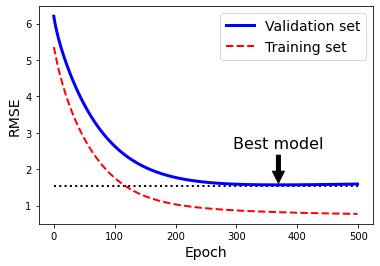

In [34]:
# 그래프로 표현

sgd_reg = SGDRegressor(max_iter = 1, tol = -np.infty, warm_start = True, penalty = None, 
                       learning_rate = "constant", eta0 = 0.0005, random_state = 42)
# warm_start = True 지정시 fit()메서드 호출시 처음부터 다시 시작하지 않고 이전 모델 파라미터에서 훈련을 이어간다.

# 에포크 수 초기화
n_epochs = 500
# RMSE값을 담을 변수
train_errors, val_errors = [], []

# 에포크 진행
for epoch in range(n_epochs):
    sgd_reg.fit(X_train_poly_scaled, y_train)
    y_train_predict = sgd_reg.predict(X_train_poly_scaled)
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    train_errors.append(mean_squared_error(y_train, y_train_predict)) # 훈련세트에 대한 RMSE
    val_errors.append(mean_squared_error(y_val, y_val_predict)) # 검증세트에 대한 RMSE
    

# 검증세트에 대한 RMSE값중에 최소값을 활용해 에포크값과 RMSE 저장
best_epoch = np.argmin(val_errors)
best_val_rmse = np.sqrt(val_errors[best_epoch])


plt.annotate('Best model',
             xy=(best_epoch, best_val_rmse),
             xytext=(best_epoch, best_val_rmse + 1),
             ha="center",
             arrowprops=dict(facecolor='black', shrink=0.05),
             fontsize=16,
            )

best_val_rmse -= 0.03  # just to make the graph look better
plt.plot([0, n_epochs], [best_val_rmse, best_val_rmse], "k:", linewidth=2) # 검은 점선
plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="Validation set") # 파란 선
plt.plot(np.sqrt(train_errors), "r--", linewidth=2, label="Training set") # 빨간 점선
plt.legend(loc="upper right", fontsize=14)
plt.xlabel("Epoch", fontsize=14)
plt.ylabel("RMSE", fontsize=14)
plt.show()

In [35]:
# 로지스틱 회귀
# 회귀 알고리즘을 활용한 분류
# 해당 클래스에 속할 확률로 분류를 진행
# 0과 1사이에 확률을 출력하는 시그모이드 함수 활용

# 1. 이진 분류기
# 꽃잎의 너비를 기반으로 Iris-Versicolor 종을 분류하는 알고리즘
from sklearn import datasets
iris = datasets.load_iris()
list(iris.keys())

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename']

In [36]:
X = iris["data"][:, 3:] # 꽃잎의 너비에 관한 데이터
y = (iris["target"] == 2).astype(np.int) 
# 3가지의 종준 2번째에 해당하는 종인 Iris-Versicolor이면 1 아니면 0으로 타깃데이터 생성

In [38]:
# 모델 생성 및 훈련
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X, y)

LogisticRegression()

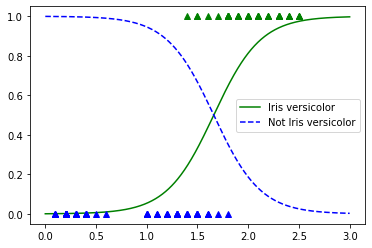

In [116]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)
y_iris, y_not_iris = [], []
for i in y:
    if i == 1 :
        y_iris.append(1)
    if i == 0 :
        y_not_iris.append(0)
y_iris = np.array(y_iris).reshape(-1, 1)
y_not_iris = np.array(y_not_iris).reshape(-1, 1)
X_not_iris = X[:100]
X_iris = X[100:]
        
plt.plot(X_new, y_proba[:, 1], "g-", label="Iris versicolor")
plt.plot(X_new, y_proba[:, 0], "b--", label="Not Iris versicolor")
plt.plot(X_iris, y_iris, "g^")
plt.plot(X_not_iris, y_not_iris, "b^")
plt.legend()
plt.show()

In [ ]:
# 그래프 해석
# 너비가 클수록 혹은 작을수록 클래스에 대한 구별이 가능하지만 해당 데이터가 겹치는 부분은 존재
# 그 부분에 대해서 확률로 자세히 나타남

In [123]:
# 겹치는 부분이 있더라도 확률을 통해 로지스틱회귀는 분류됨
log_reg.predict([[1.7]])

array([1])

In [126]:
# 2. 다중 분류기
# 로지스틱 회귀에서 소프트맥스 함수를 사용하면 다중 분류가 가능

X = iris["data"][:, (2,3)] # 꽃잎 길이, 꽃잎 너비
y = iris["target"]

softmax_reg = LogisticRegression(multi_class = "multinomial", solver="lbfgs", C = 10)
# C 는 규제
softmax_reg.fit(X, y)

LogisticRegression(C=10, multi_class='multinomial')

In [129]:
softmax_reg.predict([[5, 2]])
# 길이 5, 너비 2인 꽃을 클래스 2로 분류

array([2])

In [131]:
softmax_reg.predict_proba([[5, 2]])
# 클래스 0, 1, 2중 2가 가장 높은 확률

array([[6.38014896e-07, 5.74929995e-02, 9.42506362e-01]])

In [1]:
# 4장 그래프 5장 정리에 해놓음.